In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode

In [35]:
n = 10
r = 7
def prior(p):
    return np.where(np.logical_and(p >= 0, p <= 1), 1, 0)
def Likelihood(p, r, n):
    return np.power(p,r)*np.power(1-p,n-r)
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

In [36]:
p = np.linspace(0,1,100)
Pos = Posterior(p,r,n)

In [37]:
def Metropolis(x0, Posterior, NSteps=int(1e4), delta=0.4):
    x = np.zeros((NSteps, 1))
    x[0] = x0
    
    for i in tqdm(range(1, NSteps)):
        P0 = Posterior(x[i - 1], r, n)
        xf = x[i - 1] + delta * 2 * (np.random.rand() - 0.5)
        P1 = Posterior(xf, r, n)
        
        alpha = np.minimum(1, P1 / P0)
        g = np.random.rand()
        
        if alpha > g:
            x[i, 0] = xf
        else:
            x[i, :] = x[i - 1, :]
            
    return x[1000:, :]
initparams = np.array([0.2])
MCMC = Metropolis(initparams,Posterior)

100%|██████████| 9999/9999 [00:00<00:00, 16971.21it/s]


(array([0.11320574, 0.08490431, 0.09905502, 0.05660287, 0.05660287,
        0.        , 0.01415072, 0.08490431, 0.08490431, 0.01415072,
        0.15565789, 0.05660287, 0.11320574, 0.02830144, 0.14150718,
        0.15565789, 0.22641148, 0.65093301, 0.28301435, 0.26886363,
        0.35376794, 0.18395933, 0.38206937, 0.29716507, 0.21226076,
        0.55187799, 0.7216866 , 0.39622009, 0.66508373, 0.42452153,
        0.66508373, 1.01885167, 0.83489234, 0.99055023, 1.01885167,
        1.35846889, 1.49997606, 1.44337319, 1.18866028, 1.68393539,
        1.98110046, 1.54242822, 1.51412678, 1.98110046, 2.23581338,
        1.93864831, 2.22166266, 2.43392342, 2.40562199, 2.02355261,
        2.36316983, 2.37732055, 2.34901912, 2.75938993, 2.71693777,
        2.39147127, 2.46222486, 2.29241625, 2.8159928 , 2.5754306 ,
        3.02825356, 2.71693777, 3.07070571, 3.45277509, 2.98580141,
        3.04240428, 2.58958132, 3.07070571, 2.85844495, 2.64618419,
        3.49522724, 2.67448562, 2.71693777, 2.39

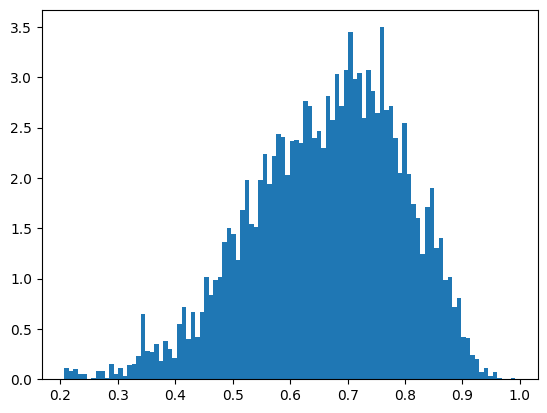

In [38]:
plt.hist(MCMC,density=True,bins=100)

In [39]:
def find_maximum(Pos, p):
    index = np.argmax(Pos)
    x_m = p[index]
    maxi = Pos[index]
    maxx = [x_m, maxi]
    return maxx
j = find_maximum(Pos,p)
j

[0.696969696969697, 0.002223081851969984]

La moneda esta trucada


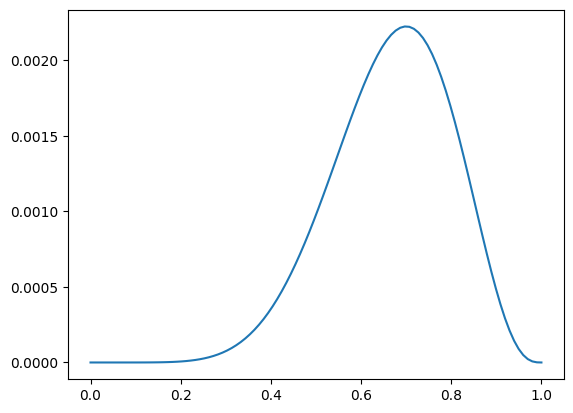

In [42]:
plt.plot(p,Pos)
print("La moneda esta trucada")